In [1]:
!pip install git+git://github.com/geopandas/geopandas.git -q

     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 36.0 MB/s 


In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option("max.columns", 30)

print("Available Pandas Datasets", gpd.datasets.available)

Available Pandas Datasets ['naturalearth_lowres', 'naturalearth_cities', 'nybb']


Pobranie wykazu lotów

https://www.kaggle.com/ramirobentes/flights-in-brazil

In [3]:
!gdown --id "1UHwEp3wjprkHAKeUJDoTG9GWftIWyN5Q"

Downloading...
From: https://drive.google.com/uc?id=1UHwEp3wjprkHAKeUJDoTG9GWftIWyN5Q
To: /content/BrFlights2.csv.zip
41.6MB [00:00, 99.9MB/s]


In [4]:
!unzip "BrFlights2.csv.zip"

Archive:  BrFlights2.csv.zip
  inflating: BrFlights2.csv          


In [20]:
df = pd.read_csv("BrFlights2.csv", nrows=5000, encoding="latin1")
df = df[["Voos", "Companhia.Aerea","LongDest","LatDest","LongOrig","LatOrig", "Cidade.Origem", "Cidade.Destino", "Pais.Origem", "Pais.Destino"]]
print("Dataset Size : ",df.shape)
df.head()

Dataset Size :  (5000, 10)


,Voos,Companhia.Aerea,LongDest,LatDest,LongOrig,LatOrig,Cidade.Origem,Cidade.Destino,Pais.Origem,Pais.Destino
0,AAL - 203,AMERICAN AIRLINES INC,-51.175381,-29.993473,-49.172481,-25.532713,Sao Jose Dos Pinhais,Porto Alegre,Brasil,Brasil
1,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos
2,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos
3,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos
4,AAL - 203,AMERICAN AIRLINES INC,-80.287046,25.795865,-51.175381,-29.993473,Porto Alegre,Miami,Brasil,Estados Unidos


In [21]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Nauka

https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [52]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-58.66 -34.58)', 'POINT(-47.91 -15.78)',
                     'POINT(-70.66 -33.45)', 'POINT(-74.08 4.60)',
                     'POINT(-66.86 10.48)']})

df

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT(-58.66 -34.58)
1,Brasilia,Brazil,POINT(-47.91 -15.78)
2,Santiago,Chile,POINT(-70.66 -33.45)
3,Bogota,Colombia,POINT(-74.08 4.60)
4,Caracas,Venezuela,POINT(-66.86 10.48)


In [53]:
from shapely import wkt

df['Coordinates'] = gpd.GeoSeries.from_wkt(df['Coordinates'])
df

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,POINT (-47.91000 -15.78000)
2,Santiago,Chile,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,POINT (-66.86000 10.48000)


In [56]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,POINT (-47.91000 -15.78000)
2,Santiago,Chile,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,POINT (-66.86000 10.48000)


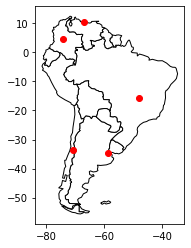

In [57]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

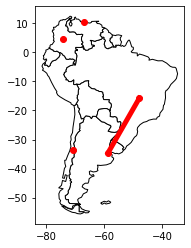

In [90]:
ax = world[world.continent == 'South America'].plot(
color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

slat = df.iloc[0]["Coordinates"].x
dlat = df.iloc[0]["Coordinates"].y
slon = df.iloc[1]["Coordinates"].x
dlon =df.iloc[1]["Coordinates"].y

plt.plot([slat,slon], [dlat,dlon], linewidth=5, color="red", alpha=1)

plt.show()

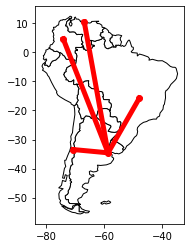

In [92]:
ax = world[world.continent == 'South America'].plot(
color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

slat = df.iloc[0]["Coordinates"].x  
dlat = df.iloc[0]["Coordinates"].y
slon = df.iloc[1]["Coordinates"].x
dlon =df.iloc[1]["Coordinates"].y

slon2 = df.iloc[2]["Coordinates"].x
dlon2 =df.iloc[2]["Coordinates"].y

slon3 = df.iloc[3]["Coordinates"].x
dlon3 =df.iloc[3]["Coordinates"].y

slon4 = df.iloc[4]["Coordinates"].x
dlon4 =df.iloc[4]["Coordinates"].y

plt.plot([slat,slon], [dlat,dlon], linewidth=5, color="red", alpha=1)   
plt.plot([slat,slon2], [dlat,dlon2], linewidth=5, color="red", alpha=1)    # dlaczego połaczenie slat, slon2 ???
plt.plot([slat,slon3], [dlat,dlon3], linewidth=5, color="red", alpha=1)
plt.plot([slat,slon4], [dlat,dlon4], linewidth=5, color="red", alpha=1)

plt.show()

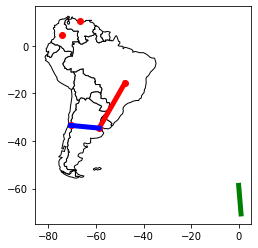

In [98]:
ax = world[world.continent == 'South America'].plot(
color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

slat = df.iloc[0]["Coordinates"].x  
dlat = df.iloc[0]["Coordinates"].y
slon = df.iloc[1]["Coordinates"].x
dlon =df.iloc[1]["Coordinates"].y

slon2 = df.iloc[2]["Coordinates"].x
dlon2 =df.iloc[2]["Coordinates"].y

slon3 = df.iloc[3]["Coordinates"].x
dlon3 =df.iloc[3]["Coordinates"].y

slon4 = df.iloc[4]["Coordinates"].x
dlon4 =df.iloc[4]["Coordinates"].y

plt.plot([slat,slon], [dlat,dlon], linewidth=5, color="red", alpha=1)   
plt.plot([slat,slon2], [dlat,dlon2], linewidth=5, color="blue", alpha=1)    # dlaczego połaczenie slat, slon2 ??? NAZWY ZMIENNYCH SĄ ZJEBANE !!! 
plt.plot([slat,slon2], linewidth=5, color="green", alpha=1)    # dlaczego połaczenie slat, slon2 ??? TO DLACZEGO MAJĄC TYLKO DWIE ZMIENNIE ROBI LINIE A MAJAC 4 ROBI TO SAMO ???


plt.show()